# Task 3: Forest Cover Type Classification

In [8]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance



In [9]:
data = pd.read_csv("/kaggle/input/covertype-forest-cover-types/covertype.csv")

# Preview dataset
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [10]:
# Dataset Overview
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(data['Cover_Type'].value_counts())


Dataset Shape: (581012, 55)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade

In [11]:
# Preprocessing: Splitting features and target
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# Training Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.953245613280208

Classification Report (Random Forest):
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



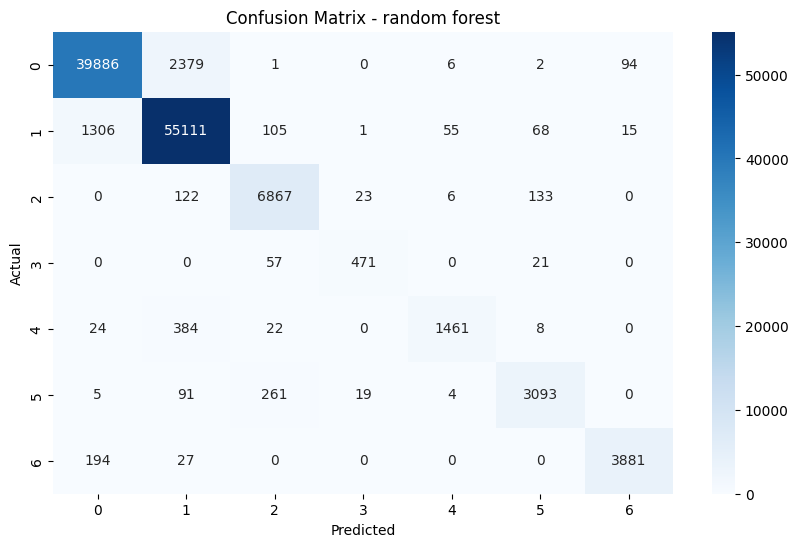

In [24]:
# Confusion Matrix for random forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - random forest")
plt.show()

In [15]:
# Train XGBoost Classifier (Fix: shift labels to start from 0)
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train, y_train_xgb)

xgb_preds = xgb_model.predict(X_test)

# Shift predictions back to match original labels (1–7)
xgb_preds = xgb_preds + 1

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))


XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     42368
           2       0.87      0.90      0.88     56661
           3       0.89      0.91      0.90      7151
           4       0.88      0.86      0.87       549
           5       0.89      0.61      0.72      1899
           6       0.85      0.80      0.82      3473
           7       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



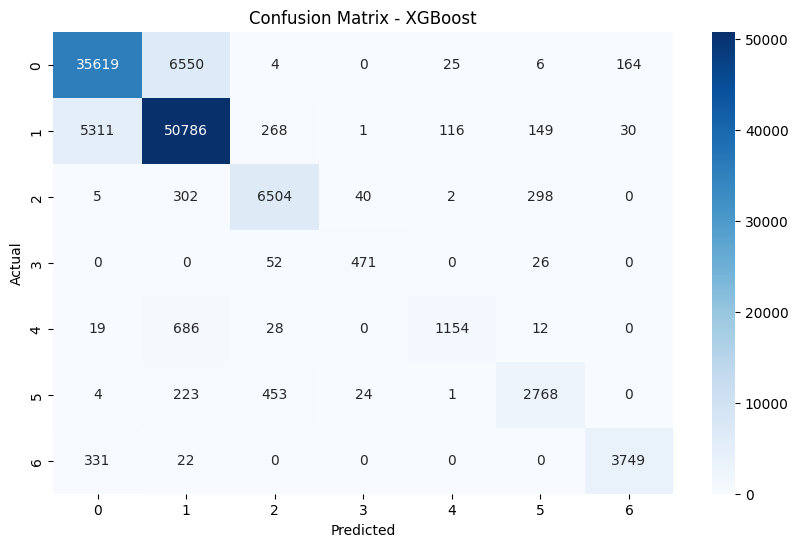

In [17]:
# Confusion Matrix for XGBoost
cm = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


<Figure size 1200x600 with 0 Axes>

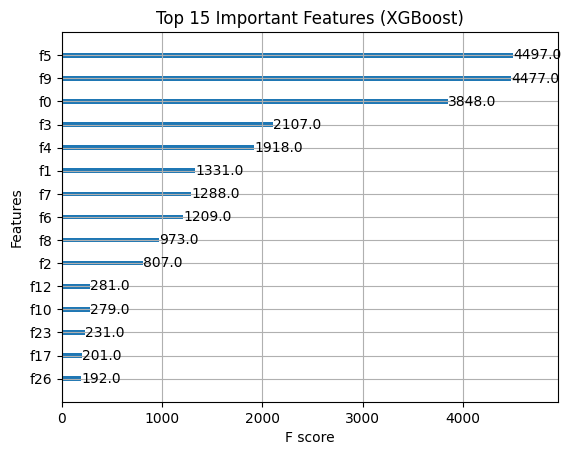

In [18]:
# Feature Importance from XGBoost
plt.figure(figsize=(12, 6))
plot_importance(xgb_model, max_num_features=15, importance_type='weight')
plt.title("Top 15 Important Features (XGBoost)")
plt.show()


In [23]:
#  Compare RF vs XGBoost
rf_acc = accuracy_score(y_test, y_pred_rf)
xgb_acc = accuracy_score(y_test, xgb_preds)

print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

if rf_acc > xgb_acc:
    print("Random Forest performed better.")
elif xgb_acc > rf_acc:
    print("XGBoost performed better.")
else:
    print("Both models performed equally well.")


Random Forest Accuracy: 0.9532
XGBoost Accuracy: 0.8696
Random Forest performed better.
